<a href="https://colab.research.google.com/github/rohanreddych/Document-image-binarization/blob/master/test/Untitled9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x_list = os.listdir("/content/drive/My Drive/300-pages/split/gray")
y_list = os.listdir("/content/drive/My Drive/300-pages/split/bin")
x_list.sort()
y_list.sort()

In [5]:
print(len(x_list), len(y_list))

5328 5328


In [0]:
X = ["/content/drive/My Drive/300-pages/split/gray/"+i for i in x_list]
y = ["/content/drive/My Drive/300-pages/split/bin/"+i for i in y_list]

In [0]:
def pp(img, label):
    img = tf.io.read_file(img)
    img = tf.image.decode_png(img, channels=1)
    img = tf.image.resize(img, [28,28])
    img = tf.reshape(img, [784,])
    img = img / 255.
    lbl = tf.io.read_file(label)
    lbl = tf.image.decode_png(lbl, channels=1)
    lbl = tf.image.resize(lbl,[28,28])
    lbl = tf.reshape(lbl, [784,])
    lbl = lbl / 255.
    return img, lbl

In [0]:
dataset = tf.data.Dataset.from_tensor_slices((X,y))#data

In [0]:
ds2 = dataset.map(pp)

In [20]:
for i,j in ds2.take(2):
    print(i,j)

tf.Tensor(
[0.97548896 0.8915967  0.8842437  0.8879552  0.88809526 0.89882326
 0.89337987 0.88747    0.88383853 0.8980392  0.8980392  0.88235295
 0.88235295 0.8784989  0.8772046  0.8934949  0.88235295 0.88235295
 0.88235295 0.89528066 0.9026611  0.88260055 0.88235295 0.87986565
 0.8958246  0.88235295 0.88235295 0.88235295 0.9722576  0.8976891
 0.8980392  0.89523804 0.8901961  0.89026606 0.8828369  0.8980392
 0.8848739  0.9049758  0.89362746 0.88235295 0.88310075 0.8980392
 0.8980392  0.8856217  0.8980392  0.89352244 0.9010504  0.8980392
 0.90506953 0.9133053  0.89561695 0.8737394  0.8980392  0.88235295
 0.88235295 0.88235295 0.96666664 0.88270307 0.8980392  0.90546215
 0.8980392  0.88235295 0.88298315 0.9046681  0.9128852  0.9128151
 0.9039828  0.8980392  0.8980392  0.90400416 0.8957283  0.8980392
 0.8977591  0.8882353  0.9137255  0.9131965  0.9137255  0.90546215
 0.9137255  0.91273135 0.8980392  0.88991606 0.8988795  0.8917367
 0.9635417  0.8980392  0.89976364 0.8980392  0.9147059  0.

In [0]:
from tensorflow.keras import layers

In [0]:
model1 = tf.keras.models.Sequential([layers.InputLayer(input_shape=(784,)),
                                     layers.Dense(1000, activation="relu"),
                                     layers.Dense(100, activation="relu"),
                                     layers.Dense(10, activation="sigmoid"),
                                     layers.Dense(100, activation="relu"),
                                     layers.Dense(1000, activation="relu"),
                                     layers.Dense(784, activation="relu"),
])

In [0]:
model1.compile(loss="mse",optimizer="adam")

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dense_11 (Dense)             (None, 784)               784784    
Total params: 1,772,994
Trainable params: 1,772,994
Non-trainable params: 0
____________________________________________

In [0]:
ds3 = ds2.batch(10)

In [29]:
model1.fit(ds3)

Train for 533 steps
533/533 [==============================] - 1587s 3s/step - loss: 0.3866


In [0]:
test_x = []
test_y = []
pred = []
for i,j in ds2.take(5):
    test_x.append(i)
    test_y.append(j)
test_x = tf.reshape(test_x, [5,784])
preds = model1.predict(test_x)

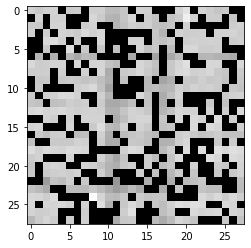

In [33]:
plt.imshow(preds[0].reshape(28,28), cmap="gray")

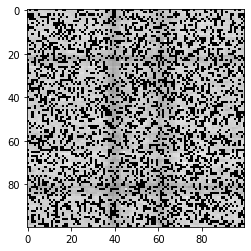

In [0]:
plt.imshow(preds[1].reshape(100,100), cmap="gray")

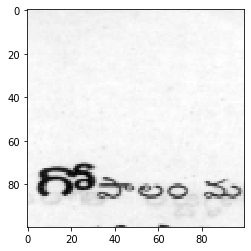

In [0]:
plt.imshow(test_x[1].numpy().reshape(100,100),cmap="gray")